# Plot square error surface for multiple linear functions $y=f(x)$

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [38]:
import math

In [100]:
# Plots sum of square errors for all samples.
# Samples are functions y(x).
def plot_square_err_sum(samples, title):

    xlim = 10
    ylim = 50    
    x = np.arange(-1*xlim, xlim, 0.5)
    y = np.arange(-1*ylim, ylim, 1)
    X, Y = np.meshgrid(x, y)

    sq_errors = map(lambda sample: (Y-sample(X))**2, samples)
    J = sum(sq_errors)/2
    fig = plt.figure(figsize=(20,10))
    levels = MaxNLocator(nbins=15).tick_values(J.min(), J.max())
    
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.contourf(x, y, J, cmap=cmap, levels=levels)
    #ax0.colorbar(im)
    
    # draw lines
    for sample in samples:
        y_ = sample(x)
        ax0.plot(x,y_,'b--')
    
    ax0.set_ylim(-1*ylim, ylim)
    ax0.set_xlim(-1*xlim, xlim)
    ax0.set_ylabel("Y")
    
    fontdic = {
        'fontsize': 18
    }
    ax0.set_title(title, fontdict=fontdic)
    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    ax1.plot_surface(X,Y,J, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("Y")
       
    
    # fig.colorbar(surf,shrink=0.5, aspect=5)
    plt.show()

In [101]:
# Linear function
def y(a,b):
    def res(x):
        r = a*x + b    
        return r
    return res

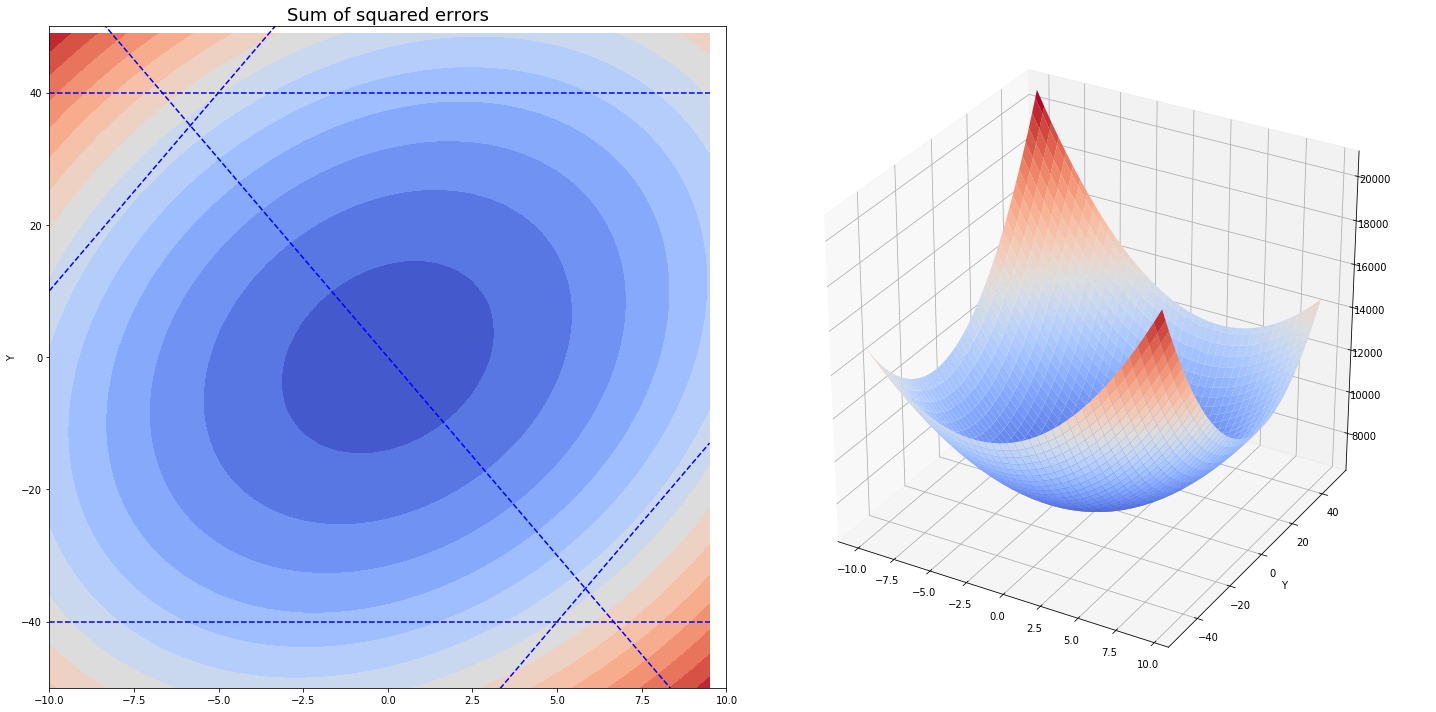

In [102]:
y1 = y(0,-40)
y2 = y(-6,0)
y3 = y(6,70)
y4 = y(6, -70)
y5 = y(0,40)
plot_square_err_sum([y1,y2,y3,y4,y5],"Sum of squared errors")

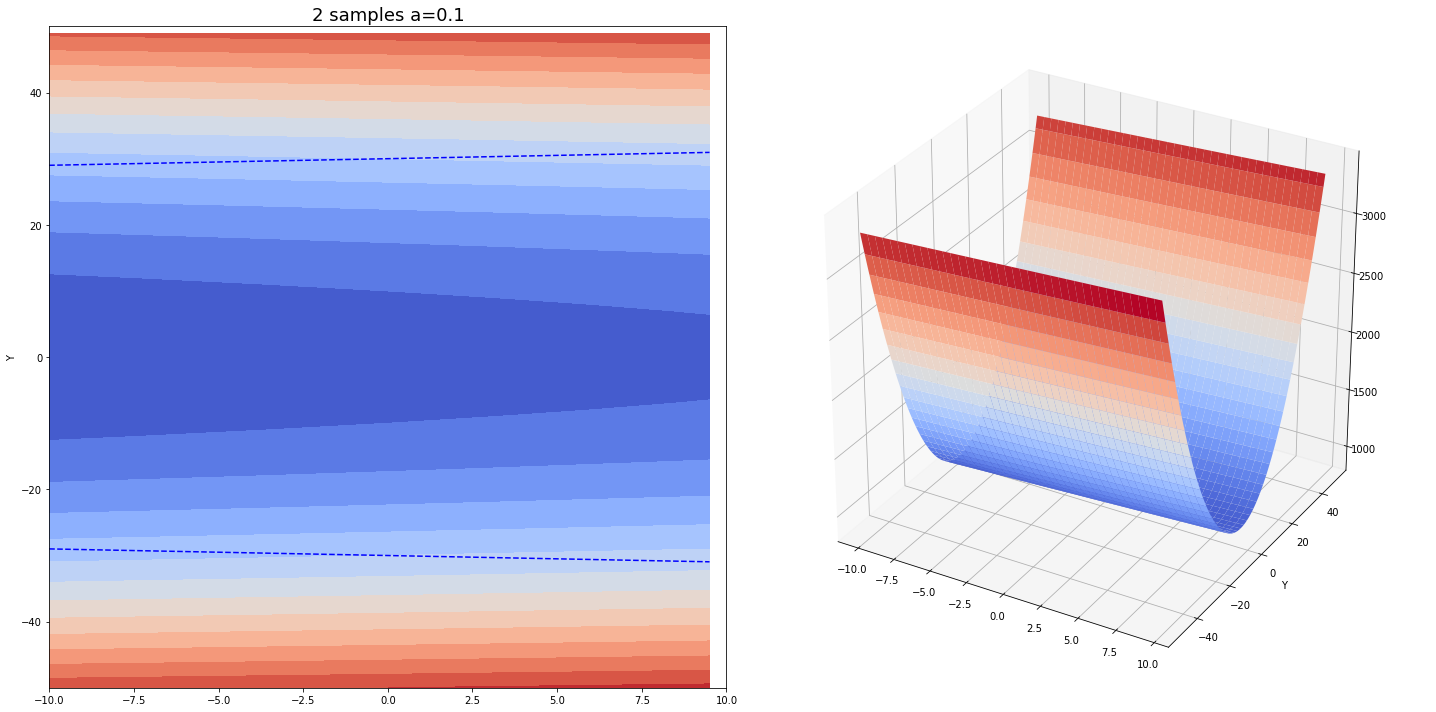

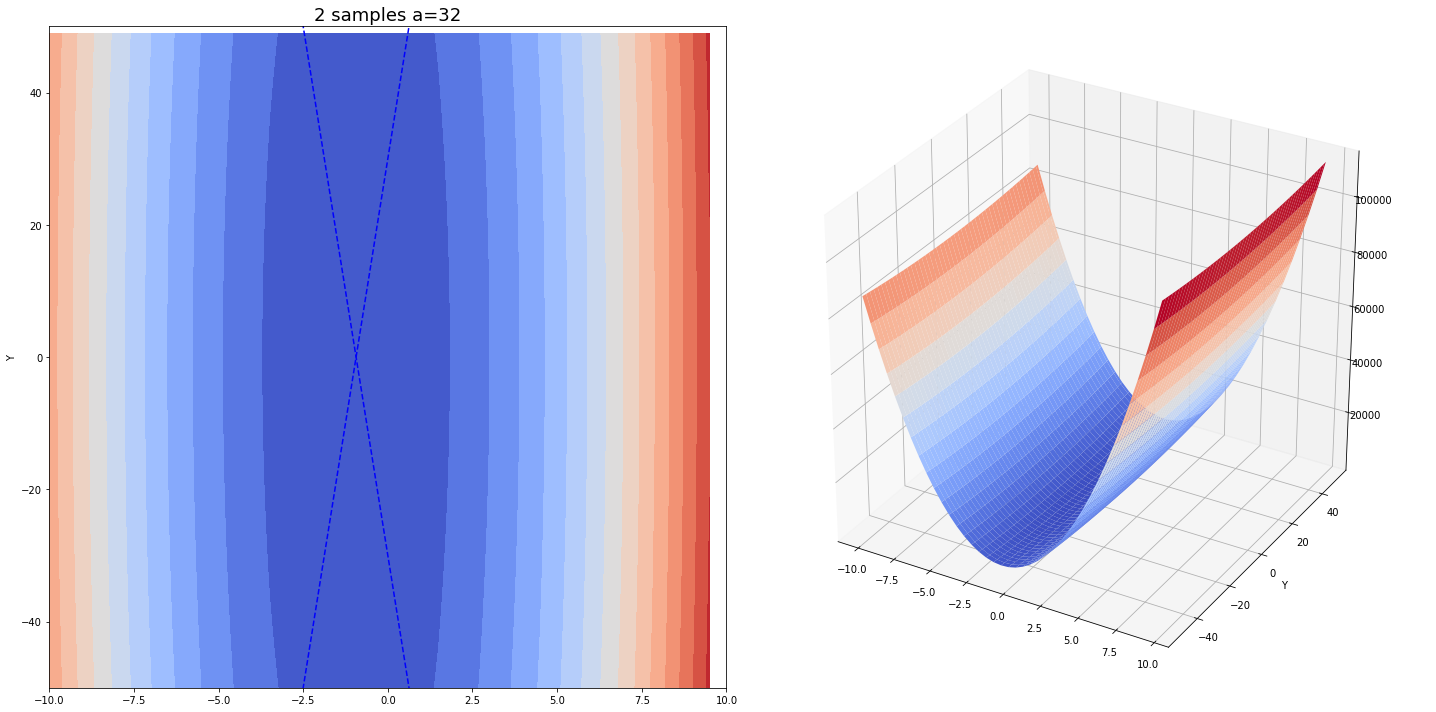

In [103]:
for a in [0.1,32]:
    y1 = y(a,30)
    y2 = y(-a,-30)
    plot_square_err_sum([y1,y2],"2 samples a="+str(a))

In [104]:
# Logistic function
def yy(a,b):
    def res(x):
        r = -1.*(a*x + b)
        r = np.exp(r)
        r = 1./(1. + r)
        return r
    return res

## Logistic regression cost function

$$ J = - \frac{1}{m} \sum_{i}[\, y_i\: log(h(x_i)) + (1 - y_i)\; log(1 - h(x_i)) \, ]$$

In [139]:

def plot_logistic_err(samples, title):
    xlim = [-15,15]
    ylim = [0,1] 
    x = np.arange(xlim[0], xlim[1]+.1, .1)
    y = np.arange(ylim[0], ylim[1]+.1, .1)
    X, Y = np.meshgrid(x, y)

    one_sample_errs = map(lambda sample: Y*np.log(sample(X))+(1-Y)*np.log(1-sample(X)), samples)
    J = sum(one_sample_errs)/len(samples)

    fig = plt.figure(figsize=(20,10))
    levels = MaxNLocator(nbins=15).tick_values(J.min(), J.max())
    
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.contourf(x, y, J, cmap=cmap, levels=levels)
    #ax0.colorbar(im)
    
    # draw lines
    for sample in samples:
        y_ = sample(x)
        ax0.plot(x,y_,'b--')
    
    ax0.set_ylim(ylim[0], ylim[1])
    ax0.set_xlim(xlim[0], xlim[1])
    ax0.set_ylabel("Y")
    
    fontdic = {
        'fontsize': 18
    }
    ax0.set_title(title, fontdict=fontdic)
    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    ax1.plot_surface(X,Y,J, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("Y")
       
    ax0.grid()
    # fig.colorbar(surf,shrink=0.5, aspect=5)
    plt.show()

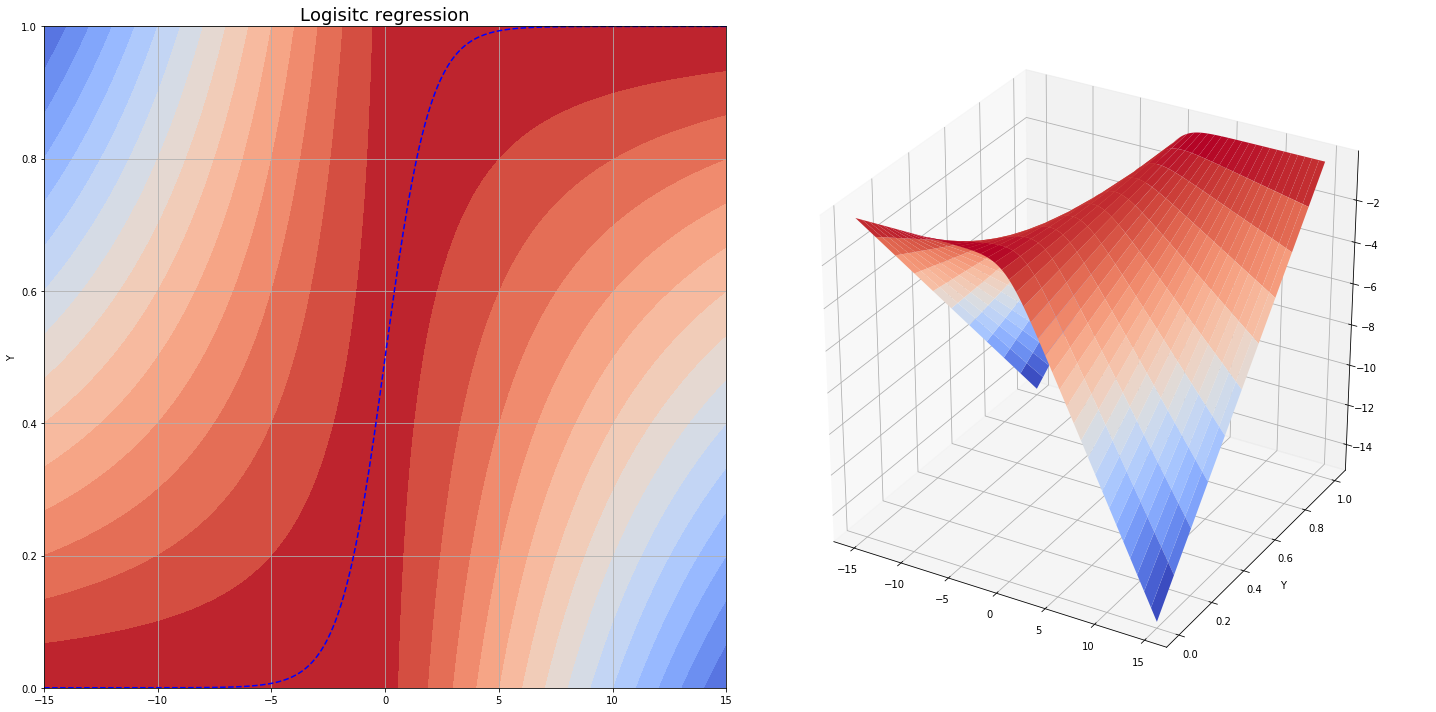

In [140]:
y1 = yy(1,0)
y2 = yy(1,2)

plot_logistic_err([y1],"Logisitc regression")